In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

/home/garima/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pwd


'/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_2/Milestone_Project-Week2'

## Step 1
Read the file train.csv into Python and print a few rows.

In [3]:
train_data = pd.read_csv("data/train.csv",index_col= "PassengerId")

In [4]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df = train_data.copy()

In [6]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Step 2
Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# number of surviving passengers 
train_df[["Survived"]].sum()

Survived    342
dtype: int64

In [9]:
# number of non-surviving passengers 
train_df[train_df["Survived"] == 0].count()

Survived    549
Pclass      549
Name        549
Sex         549
Age         424
SibSp       549
Parch       549
Ticket      549
Fare        549
Cabin        68
Embarked    549
dtype: int64

In [10]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train_df.shape

(891, 11)

In [12]:
# better way
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Bar plot

[Text(0, 0, 'Not survived'), Text(1, 0, 'Survived')]

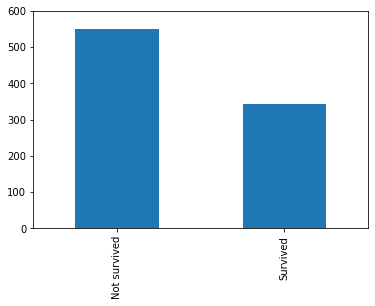

In [13]:
ax = train_df["Survived"].value_counts().plot(kind = "bar", width=0.5)
ax.set_ylim((0, 600))
ax.set_xticklabels(['Not survived','Survived'])

### Step 3
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [14]:
Pclass_subset = train_df.groupby("Pclass")["Survived"]

In [15]:
Pclass_subset

In [16]:
train_df["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
Pclass_subset.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
train_df.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [19]:
train_df[train_df["Survived"] == 0].count()/train_df["Survived"].count()

Survived    0.616162
Pclass      0.616162
Name        0.616162
Sex         0.616162
Age         0.475870
SibSp       0.616162
Parch       0.616162
Ticket      0.616162
Fare        0.616162
Cabin       0.076319
Embarked    0.616162
dtype: float64

In [20]:
train_df[["Survived"]].count()

Survived    891
dtype: int64

In [21]:
Survived_1class = train_df[(train_df["Survived"] == 1) & (train_df["Pclass"] == 1)]["Survived"].count()

In [22]:
Total_1class = train_df[train_df["Pclass"] == 1]["Survived"].count()
Total_1class

216

In [23]:
#the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
proportion_class1 = Survived_1class / Total_1class
print(proportion_class1)

0.6296296296296297


In [24]:
# method 2 (complicated method)
df_survived_1class = train_df.groupby(['Pclass']).apply(lambda df: pd.Series({'Survived': df[df["Survived"] == 1]["Survived"].count(), 'Not_survived': df[df["Survived"] == 0]["Survived"].count()}))
df_survived_1class['proportion_Survived'] = df_survived_1class['Survived'] / (df_survived_1class['Survived'] + df_survived_1class['Not_survived'])
#df_survived_1class[df_survived_1class['Pclass'] == 1]['proportion_Survived']
df_survived_1class

,Survived,Not_survived,proportion_Survived
Pclass,,,
1,136,80,0.629630
2,87,97,0.472826
3,119,372,0.242363


In [25]:
df_survived_1class.iloc[0,2]

0.6296296296296297

### Step 4
Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [26]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


[Text(0.5, 0, 'Passenger class'), Text(0, 0.5, 'Number of passangers')]

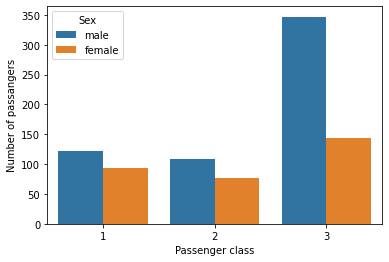

In [27]:
ax = sns.countplot(x = 'Pclass', hue = 'Sex' ,data = train_df)

ax.set( xlabel="Passenger class", ylabel="Number of passangers")

<AxesSubplot:xlabel='Pclass'>

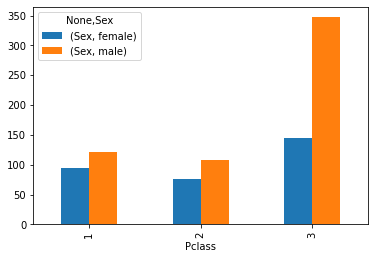

In [28]:
train_df_group = train_df.groupby(['Pclass','Sex'])['Sex'].count().to_frame()
train_df_group.unstack().plot(kind = 'bar')

### Step 5
Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<AxesSubplot:>

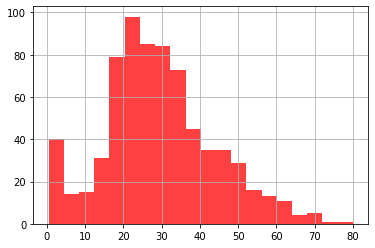

In [29]:
train_df['Age'].hist(bins=20, facecolor='#ff0000',alpha=0.75,histtype='bar')

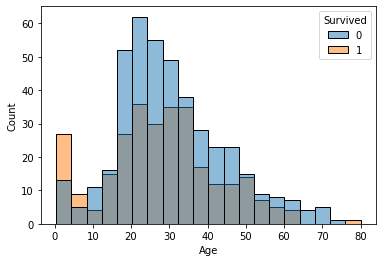

In [30]:
ax = sns.histplot(x = 'Age', hue = 'Survived' ,data = train_df)

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

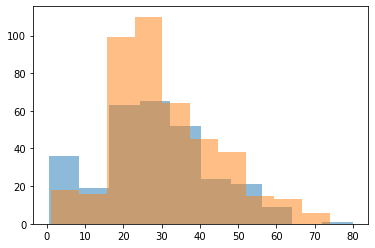

In [31]:
# method 2 with matplotlib
plt.hist(train_df['Age'][train_df['Survived'] == 1], alpha  = 0.5)
plt.hist(train_df['Age'][train_df['Survived'] == 0], alpha  = 0.5)

### Step 6
Calculate the average age for survived and drowned passengers separately.

In [32]:
round(train_df.groupby(['Survived'])["Age"].agg("mean"), 1)

Survived
0    30.6
1    28.3
Name: Age, dtype: float64

### Step 7
Replace missing age values by the mean age.

In [33]:
train_df["Age"].isna().sum()

177

In [34]:
train_df['Age'].fillna(value = train_df['Age'].mean(), inplace=True)

In [35]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_df["Age"].isna().sum()

0

### Step 8
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [37]:
#try_df  = pd.melt(train_df, id_vars =['Pclass', 'Sex'], value_vars =['Survived'])
#try_df.value_counts()

In [38]:
train_df.groupby(["Pclass", "Sex"])["Survived"].count().to_frame().reset_index()

,Pclass,Sex,Survived
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


### Build a logistic regression model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [40]:
#X = train_df[['Pclass', 'Sex']]
X = train_df[['Pclass']]
y = train_df['Survived']

In [41]:
X.shape, y.shape

((891, 1), (891,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
# instatiate the model
m_lr = LogisticRegression()

In [44]:
# train the model
m_lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
# our coefficients
m_lr.coef_, m_lr.intercept_

(array([[-0.80428557]]), array([1.34321569]))

### Evaluate the model

In [46]:
# score on the training data
m_lr.score(X_train, y_train)

0.6721556886227545

In [47]:
# score on the test data
m_lr.score(X_test, y_test)

0.6995515695067265

In [48]:
# probability of  positive case or 1 i.e. survival in this case
m_lr.predict_proba(X)
# returns array for each y as [prob_of_0, prob_of_1]
# if prob_of_1 is 0.255, that means it is false

array([[0.74452864, 0.25547136],
       [0.3684365 , 0.6315635 ],
       [0.74452864, 0.25547136],
       ...,
       [0.74452864, 0.25547136],
       [0.3684365 , 0.6315635 ],
       [0.74452864, 0.25547136]])

In [49]:

#Using [:,1] will give you the probabilities of getting the output as 1 i.e. second column of the above output. 
#If you replace 1 with 0 in the above code, you will only get the probabilities of getting the output as 0.

# we can play  with the threshold to control the probabilities for data points belonging to the positive class
# for negative class use [:,0]


threshold = 0.5
LR_Grid_ytest_THR = ((m_lr.predict_proba(X_test)[:, 1])>= threshold)
LR_Grid_ytest_THR

array([False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True,

In [50]:
LR_Grid_ytest_THR = ((m_lr.predict_proba(X_test)[:, 1])>= threshold).astype(int)
LR_Grid_ytest_THR

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [51]:
import numpy as np

unique, counts = np.unique(LR_Grid_ytest_THR, return_counts=True)
print(np.asarray((unique, counts)).T)


[[  0 159]
 [  1  64]]


In [52]:
clf_balanced = LogisticRegression(class_weight="balanced")
clf_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [53]:
clf_balanced.coef_, clf_balanced.intercept_

(array([[-0.81090199]]), array([1.85272372]))

In [54]:
# score on the training data
clf_balanced.score(X_train, y_train)

0.6646706586826348

In [55]:
# score on the test data
clf_balanced.score(X_test, y_test)

0.6771300448430493

In [56]:
clf_balanced.predict_proba(X)

array([[0.64106332, 0.35893668],
       [0.26079864, 0.73920136],
       [0.64106332, 0.35893668],
       ...,
       [0.64106332, 0.35893668],
       [0.26079864, 0.73920136],
       [0.64106332, 0.35893668]])

In [57]:
# plot predictions vs loss
#pyplot.plot(predictions, losses)
#pyplot.show()

### Feature Engineer the data

Create a few ColumnTransformers and train them on the Titanic data. Here are a few ideas to work on:

impute the missing values in the Age column

one-hot-encode the Embarked column

bin the imputed Age column into 3 bins (young, middle-aged, old)

scale the Fare column

In [58]:
# new stuff !!
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer

In [59]:
train_df_group = train_data.copy()

In [60]:
train_df_group.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [61]:
X_fulldf = train_df_group[['Sex','Age','Fare','Embarked', 'Pclass']]
y_fulldf = train_df_group['Survived']

In [62]:
X_fulldf.shape, y_fulldf.shape

((891, 5), (891,))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_fulldf, y_fulldf, test_size=0.25, random_state=42)

In [64]:
pipeline_embarked = Pipeline(
[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

In [65]:
pipeline_age = Pipeline(
[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("binning", KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform'))
])

In [66]:
final_transformation = ColumnTransformer(
    [
        ("transform twice imputer_encoder", pipeline_embarked, ['Embarked']),
        ("transform twice imputer_binning", pipeline_age, ['Age']),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False, drop="if_binary"), ["Sex"]),
        ("binning", KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform'), ["Pclass"]),
        ("scaler", StandardScaler(), ['Fare'])
    ]
)   

In [67]:
X_train_FE = final_transformation.fit_transform(X_train)

In [68]:
X_test_FE = final_transformation.transform(X_test)

In [69]:
clf_lr = LogisticRegression()

In [70]:
clf_lr.fit(X_train_FE, y_train)

LogisticRegression()

In [71]:
clf_lr.predict_proba(X_test_FE)

array([[0.83465924, 0.16534076],
       [0.73781024, 0.26218976],
       [0.90842365, 0.09157635],
       [0.1903796 , 0.8096204 ],
       [0.30374916, 0.69625084],
       [0.13349063, 0.86650937],
       [0.35654394, 0.64345606],
       [0.90628099, 0.09371901],
       [0.35654394, 0.64345606],
       [0.14963717, 0.85036283],
       [0.6502059 , 0.3497941 ],
       [0.90557873, 0.09442127],
       [0.44806422, 0.55193578],
       [0.8328405 , 0.1671595 ],
       [0.73658486, 0.26341514],
       [0.14546345, 0.85453655],
       [0.65051989, 0.34948011],
       [0.35649798, 0.64350202],
       [0.73658486, 0.26341514],
       [0.65083859, 0.34916141],
       [0.90842979, 0.09157021],
       [0.66532484, 0.33467516],
       [0.45910752, 0.54089248],
       [0.90814967, 0.09185033],
       [0.90703038, 0.09296962],
       [0.90413187, 0.09586813],
       [0.50678746, 0.49321254],
       [0.73658486, 0.26341514],
       [0.90413187, 0.09586813],
       [0.45082209, 0.54917791],
       [0.

In [72]:
clf_lr.predict(X_test_FE)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0])

In [73]:
clf_lr.score(X_train_FE, y_train) 

0.7874251497005988

In [74]:
clf_lr.score(X_test_FE, y_test)

0.7713004484304933

### Advanced Ideas

In [75]:
train_df_advance = train_data.copy()

In [76]:
train_df_advance

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [77]:
X_adv = train_df_advance[['Sex','Age', 'Pclass', 'SibSp','Parch','Name','Embarked','Cabin']]
y_adv = train_df_advance['Survived']

In [78]:
X_adv.shape, y_adv.shape

((891, 8), (891,))

In [79]:
X_adv['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [80]:
X_adv

,Sex,Age,Pclass,SibSp,Parch,Name,Embarked,Cabin
PassengerId,,,,,,,,
1,male,22.0,3,1,0,"Braund, Mr. Owen Harris",S,NaN
2,female,38.0,1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,C85
3,female,26.0,3,0,0,"Heikkinen, Miss. Laina",S,NaN
4,female,35.0,1,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,C123
5,male,35.0,3,0,0,"Allen, Mr. William Henry",S,NaN
...,...,...,...,...,...,...,...,...
887,male,27.0,2,0,0,"Montvila, Rev. Juozas",S,NaN
888,female,19.0,1,0,0,"Graham, Miss. Margaret Edith",S,B42
889,female,NaN,3,1,2,"Johnston, Miss. Catherine Helen ""Carrie""",S,NaN


### Train test data split

In [81]:
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.25, random_state=42)

In [82]:
X_train_adv.shape, X_test_adv.shape, y_train_adv.shape, y_test_adv.shape

((668, 8), (223, 8), (668,), (223,))

In [83]:
X_train_adv

,Sex,Age,Pclass,SibSp,Parch,Name,Embarked,Cabin
PassengerId,,,,,,,,
299,male,NaN,1,0,0,"Saalfeld, Mr. Adolphe",S,C106
885,male,25.00,3,0,0,"Sutehall, Mr. Henry Jr",S,NaN
248,female,24.00,2,0,2,"Hamalainen, Mrs. William (Anna)",S,NaN
479,male,22.00,3,0,0,"Karlsson, Mr. Nils August",S,NaN
306,male,0.92,1,1,2,"Allison, Master. Hudson Trevor",S,C22 C26
...,...,...,...,...,...,...,...,...
107,female,21.00,3,0,0,"Salkjelsvik, Miss. Anna Kristine",S,NaN
271,male,NaN,1,0,0,"Cairns, Mr. Alexander",S,NaN
861,male,41.00,3,2,0,"Hansen, Mr. Claus Peter",S,NaN


### Feature engineering

In [84]:
# function to get passenger title
def passenger_title(name):

        title = name.split(".")[0].split(", ")[1]
        
        return title

In [85]:
# insert column called titles and remove name column
X_train_adv["Title"] = X_train_adv["Name"].apply(passenger_title)
X_train_adv = X_train_adv.drop(['Name'], axis=1)

In [86]:
X_test_adv["Title"] = X_test_adv["Name"].apply(passenger_title)
X_test_adv = X_test_adv.drop(['Name'], axis=1)

In [87]:
# Keep only first letter in cabin column

In [88]:
def passenger_deck(cabin):
    deck = list(cabin)[0]
    return deck

In [89]:
# feature engineer the Cabin feature in train data
X_train_adv['Cabin'] = X_train_adv['Cabin'].apply(lambda x: passenger_deck(x) if pd.notnull(x) else x)

In [90]:
# feature engineer the Cabin feature in train data
X_test_adv['Cabin'] = X_test_adv['Cabin'].apply(lambda x: passenger_deck(x) if pd.notnull(x) else x)

In [91]:
# fill missing values using mean age of each title eg: Master
X_train_adv['Age'] = X_train_adv['Age'].fillna(X_train_adv.groupby('Title')['Age'].transform('mean'))

#test set
X_test_adv['Age'] = X_test_adv['Age'].fillna(X_test_adv.groupby('Title')['Age'].transform('mean'))

In [92]:
# combine 2 features: Parch and SibSp to a new feature Family
X_train_adv["Family"] = X_train_adv["Parch"] + X_train_adv["SibSp"]
#test set
X_test_adv["Family"] = X_test_adv["Parch"] + X_test_adv["SibSp"]

In [93]:
# drop the redundant features

X_train_adv = X_train_adv.drop(["SibSp","Parch"], axis=1)
X_test_adv = X_test_adv.drop(["SibSp","Parch"], axis=1)

In [94]:
pipeline_embarked = Pipeline(
[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

In [95]:
pipeline_age = Pipeline(
[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("binning", KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform'))
])

In [105]:
transformation_2 = ColumnTransformer(
    [
        ("transform twice imputer_binning", pipeline_age, ['Age']),
        ("transform twice imputer_encoder", pipeline_embarked, ['Embarked']),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False, drop="if_binary"), ["Sex"]),
        ("binning", KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform'), ["Pclass","Family"]),
    ],

)   

In [106]:
X_train_adv_FE = transformation_2.fit_transform(X_train_adv)

In [107]:
X_train_adv_FE.shape

(668, 13)

In [108]:
# don't fit the X_test - only transform
X_test_adv_FE = transformation_2.transform(X_test_adv)

### Logistic Regression

In [109]:
clf_lr = LogisticRegression()

In [110]:
clf_lr.fit(X_train_adv_FE, y_train_adv)

LogisticRegression()

In [111]:
clf_lr.predict_proba(X_train_adv_FE)

array([[0.64507587, 0.35492413],
       [0.87682976, 0.12317024],
       [0.1496978 , 0.8503022 ],
       ...,
       [0.90735896, 0.09264104],
       [0.09251678, 0.90748322],
       [0.56915473, 0.43084527]])

In [112]:
clf_lr.predict(X_train_adv_FE)

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [113]:
clf_lr.score(X_train_adv_FE, y_train_adv) 

0.8098802395209581

In [114]:
clf_lr.score(X_test_adv_FE, y_test_adv) 

0.8071748878923767

<AxesSubplot:>

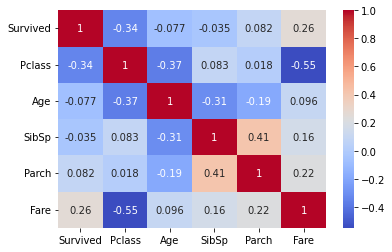

In [115]:
sns.heatmap(train_df_advance.corr(), annot = True, fmt = '.2g', cmap = 'coolwarm')

In [116]:
clf_lr.coef_

array([[ 0.32900072,  0.00994016, -0.33898784,  0.29935706, -0.03452793,
        -0.2648761 , -2.56168831,  0.74353563,  0.19722384, -0.94080643,
         1.16309753, -0.19693491, -0.96620958]])

In [117]:
ypred = clf_lr.predict(X_test_adv_FE)
accuracy_score(y_test_adv,ypred)

0.8071748878923767

In [118]:
precision = precision_score(y_test_adv,ypred)
recall = recall_score(y_test_adv,ypred)

print(precision_score(y_test_adv,ypred), recall_score(y_test_adv,ypred))

0.7875 0.7078651685393258


In [119]:
conf = confusion_matrix(y_test_adv,ypred)
conf

array([[117,  17],
       [ 26,  63]])

Text(0.5, 1.0, 'Confusion Matrix')

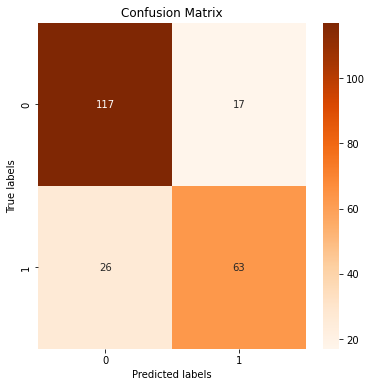

In [120]:
#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'Oranges')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

### Receiver Operator Curve and Area Under the Curve

In [121]:
probs = clf_lr.predict_proba(X_test_adv_FE) 
fpr, tpr, threshold = roc_curve(y_test_adv, probs[:,1])

In [122]:
probs[:5]

array([[0.80194769, 0.19805231],
       [0.75837218, 0.24162782],
       [0.87682976, 0.12317024],
       [0.1496978 , 0.8503022 ],
       [0.23809065, 0.76190935]])

Area under the curve =  0.872882777125608


/home/garima/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


(0.0, 1.0)

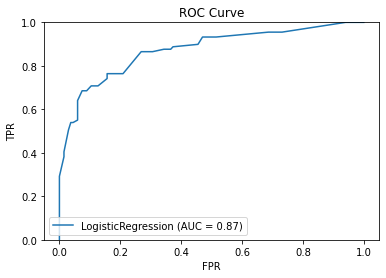

In [123]:
# Calculating area under the curve
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

plot_roc_curve(clf_lr, X_test_adv_FE, y_test_adv)  
plt.title("ROC Curve")

plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.00])

/home/garima/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


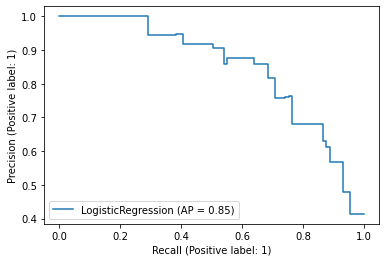

In [124]:
plot_precision_recall_curve(clf_lr, X_test_adv_FE, y_test_adv)

In [125]:
precisions, recalls, thresholds = precision_recall_curve(y_test, probs[:,1])

In [126]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

0.8558950541274482

/tmp/ipykernel_42512/2841399806.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


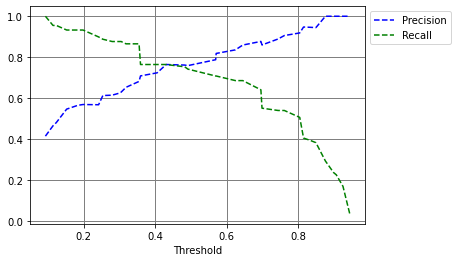

In [127]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()